# ALTERE ANTES DE RODAR PARA O RUN 3

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Gaussiana

$s_2$ = Gaussiana

In [3]:
sources = np.loadtxt(source_path+'/'+'SecondSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'SecondMixMatrix.txt')

x = np.loadtxt(obs_path+'SecondMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [4]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.13317139,  0.1130836 ],
       [ 0.13317139,  1.        ,  0.27642258],
       [ 0.1130836 ,  0.27642258,  1.        ]])

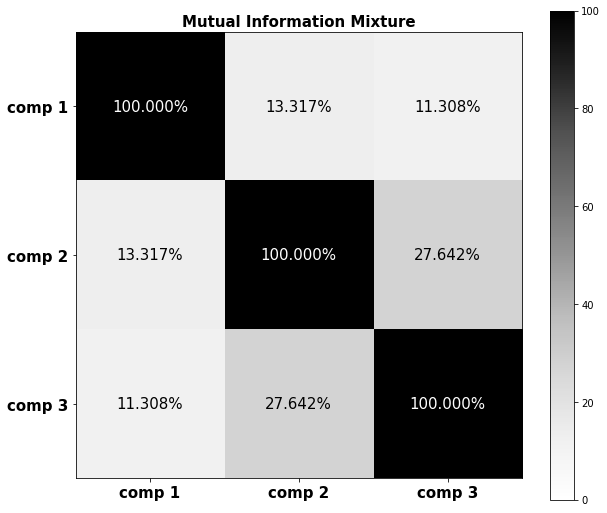

In [5]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run2_mix_MI_100',save=True)

In [6]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.07108161,  0.07017196],
       [ 0.07108161,  1.        ,  0.18021684],
       [ 0.07017196,  0.18021684,  1.        ]])

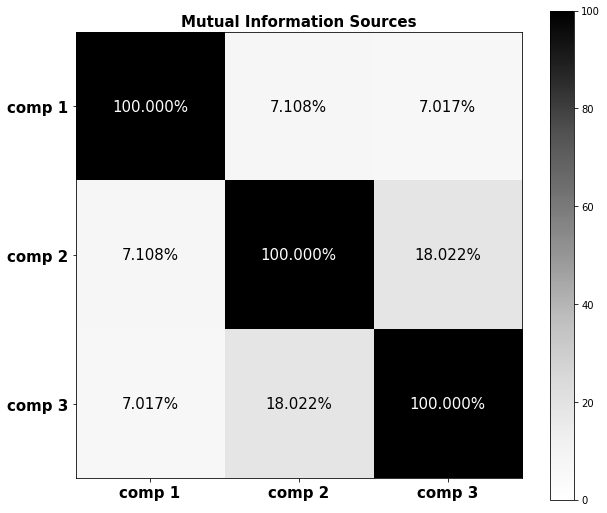

In [7]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run2_sources_MI_100',save=True)

In [8]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.27891113,  0.17215407,  0.07933562],
         [ 0.23928329,  0.10386708,  0.23601704],
         [ 0.2505029 ,  0.2641875 ,  0.10691473]]),
  array([[ 0.39396223,  0.3725693 ,  0.3549705 ],
         [ 0.18537164,  0.10743453,  0.22904743],
         [ 0.06274138,  0.19281524,  0.10457013]])],
 array([[ 0.33643668,  0.27236168,  0.21715306],
        [ 0.21232746,  0.1056508 ,  0.23253223],
        [ 0.15662214,  0.22850137,  0.10574243]]),
 array([[ 0.24913737,  0.17001217,  0.07744379],
        [ 0.25409256,  0.07359364,  0.2028944 ],
        [ 0.22037953,  0.19910645,  0.13825182]]))

In [36]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='deflation',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 6
Time to converges the FastICA: 0.022 seconds


In [34]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  5.79622812327 E2 =  3.74415332844


In [37]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.06288354,  0.0632319 ],
       [ 0.06288354,  1.        ,  0.14276864],
       [ 0.0632319 ,  0.14276864,  1.        ]])

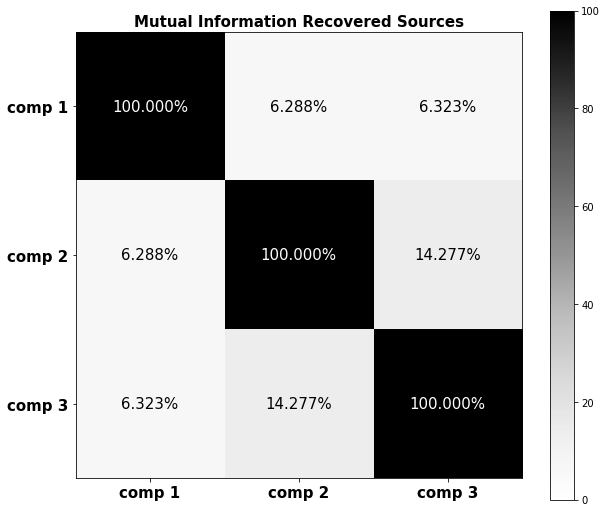

In [38]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run2_reco_MI_100',save=True)

In [39]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.74724141,  0.07305364,  0.05974833],
       [ 0.0494273 ,  0.17312703,  0.59384871],
       [ 0.09189697,  0.52152274,  0.15207497]])

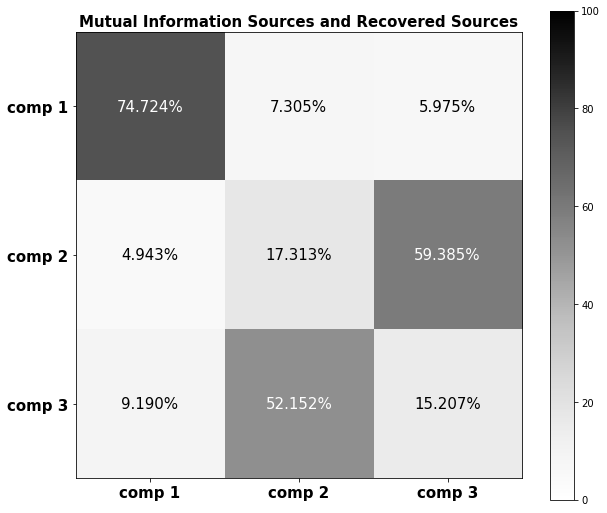

In [40]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run2_sourcesreco_MI_100',save=True)

In [41]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[2,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.74724141,  0.05974833,  0.07305364],
       [ 0.0494273 ,  0.59384871,  0.17312703],
       [ 0.09189697,  0.15207497,  0.52152274]])

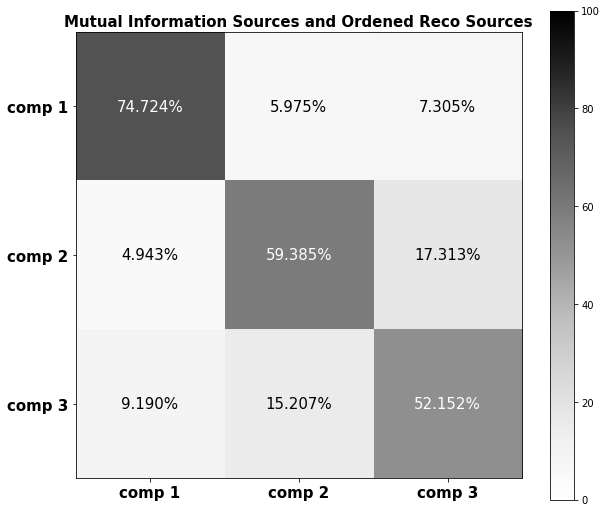

In [42]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run2_sourcesreco_ordened_MI_100',save=True)

In [43]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [44]:
SKL_div,JS_div

(array([[ 0.18236443,  0.34704111,  0.33826921],
        [ 0.26711772,  0.10701302,  0.28288376],
        [ 0.28145129,  0.26194488,  0.08789526]]),
 array([[ 0.10945164,  0.16705493,  0.17790941],
        [ 0.19801957,  0.07400356,  0.12703161],
        [ 0.19459102,  0.20108271,  0.04674457]]))

In [45]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.109452 &  0.167055 &  0.177909 \\
1 &  0.198020 &  0.074004 &  0.127032 \\
2 &  0.194591 &  0.201083 &  0.046745 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.182364 &  0.347041 &  0.338269 \\
1 &  0.267118 &  0.107013 &  0.282884 \\
2 &  0.281451 &  0.261945 &  0.087895 \\
\bottomrule
\end{tabular}



In [46]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[ 6.        ,  0.        ,  0.        ],
       [ 0.022     ,  0.        ,  0.        ],
       [ 6.0413257 ,  0.        ,  0.        ],
       [ 3.7050884 ,  0.        ,  0.        ],
       [ 0.87381188,  0.        ,  0.        ]])

# Using 1000 stats

In [47]:
sources = np.loadtxt(source_path+'/'+'SecondSource1000Stats.txt')

x = np.loadtxt(obs_path+'SecondMixture1000Stats.txt')


In [48]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.08534897,  0.06570423],
       [ 0.08534897,  1.        ,  0.20898095],
       [ 0.06570423,  0.20898095,  1.        ]])

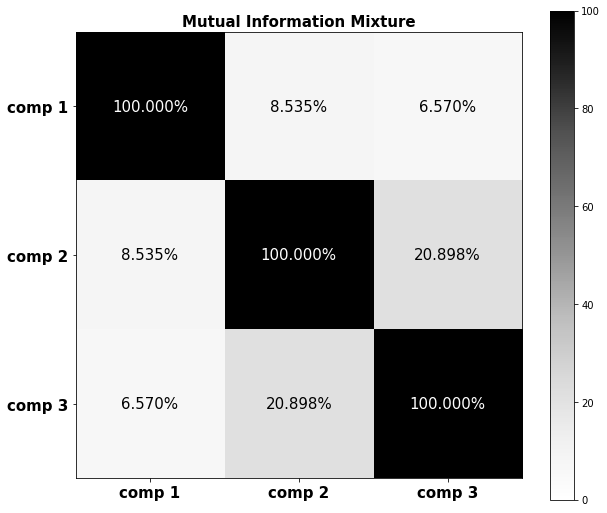

In [49]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run2_mix_MI_1k',save=True)

In [50]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02232357,  0.02381319],
       [ 0.02232357,  1.        ,  0.0850439 ],
       [ 0.02381319,  0.0850439 ,  1.        ]])

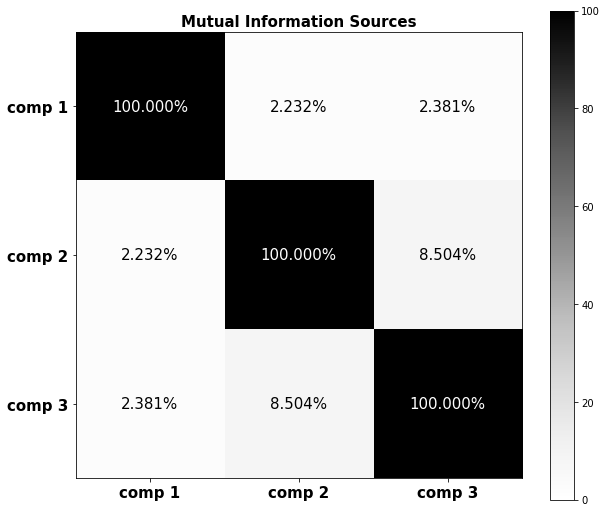

In [51]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run2_sources_MI_1k',save=True)

In [61]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='deflation',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 5
Time to converges the FastICA: 0.188 seconds


In [62]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.02429277,  0.02223253],
       [ 0.02429277,  1.        ,  0.08163013],
       [ 0.02223253,  0.08163013,  1.        ]])

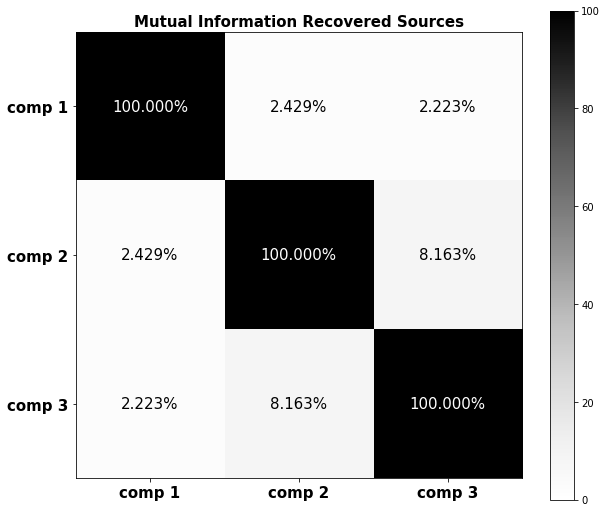

In [63]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run2_reco_MI_1k',save=True)

In [64]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.78690336,  0.0202544 ,  0.02463185],
       [ 0.0226828 ,  0.18654374,  0.18104249],
       [ 0.02427317,  0.1775884 ,  0.18875262]])

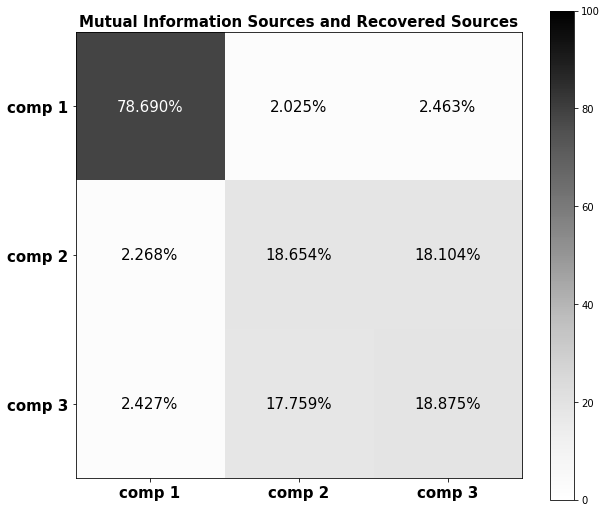

In [65]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run2_sourcesreco_MI_1k',save=True)

In [66]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.78690336,  0.0202544 ,  0.02463185],
       [ 0.0226828 ,  0.18654374,  0.18104249],
       [ 0.02427317,  0.1775884 ,  0.18875262]])

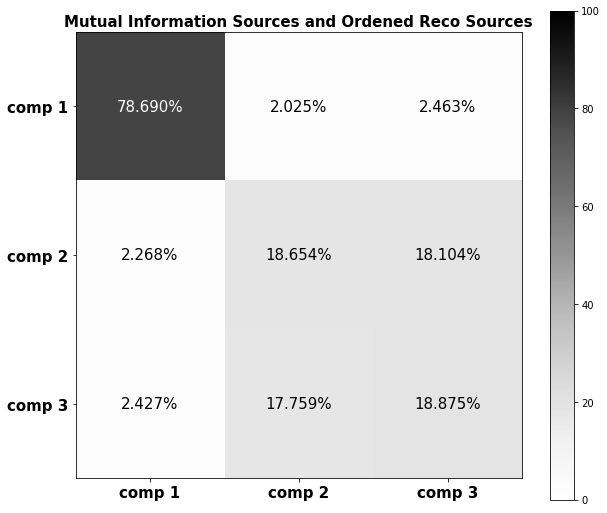

In [67]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run2_sourcesreco_ordened_MI_1k',save=True)

In [68]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [69]:
SKL_div,JS_div

(array([[ 0.07452861,  0.42314069,  0.54083499],
        [ 0.31015229,  0.10666113,  0.10045708],
        [ 0.3243689 ,  0.09135997,  0.1222019 ]]),
 array([[ 0.03452357,  0.1813851 ,  0.1825584 ],
        [ 0.22541093,  0.0606572 ,  0.04564677],
        [ 0.28966352,  0.0756525 ,  0.07275198]]))

In [70]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.034524 &  0.181385 &  0.182558 \\
1 &  0.225411 &  0.060657 &  0.045647 \\
2 &  0.289664 &  0.075653 &  0.072752 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.074529 &  0.423141 &  0.540835 \\
1 &  0.310152 &  0.106661 &  0.100457 \\
2 &  0.324369 &  0.091360 &  0.122202 \\
\bottomrule
\end{tabular}



In [71]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[ 6.        ,  5.        ,  0.        ],
       [ 0.022     ,  0.188     ,  0.        ],
       [ 6.0413257 ,  5.20997112,  0.        ],
       [ 3.7050884 ,  2.95831886,  0.        ],
       [ 0.87381188,  1.16286236,  0.        ]])

# Using 100K stats

In [72]:
sources = np.loadtxt(source_path+'/'+'SecondSource100000Stats.txt')

x = np.loadtxt(obs_path+'SecondMixture100000Stats.txt')


In [73]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.03291558,  0.01852586],
       [ 0.03291558,  1.        ,  0.12352024],
       [ 0.01852586,  0.12352024,  1.        ]])

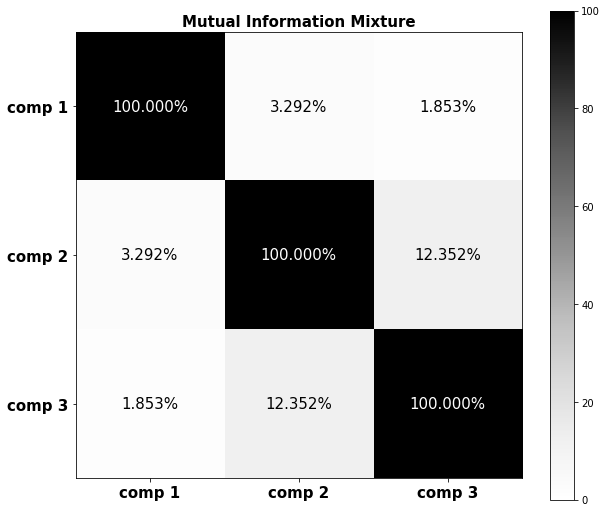

In [74]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run2_mix_MI_100k',save=True)

In [75]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00299639,  0.00258936],
       [ 0.00299639,  1.        ,  0.01302629],
       [ 0.00258936,  0.01302629,  1.        ]])

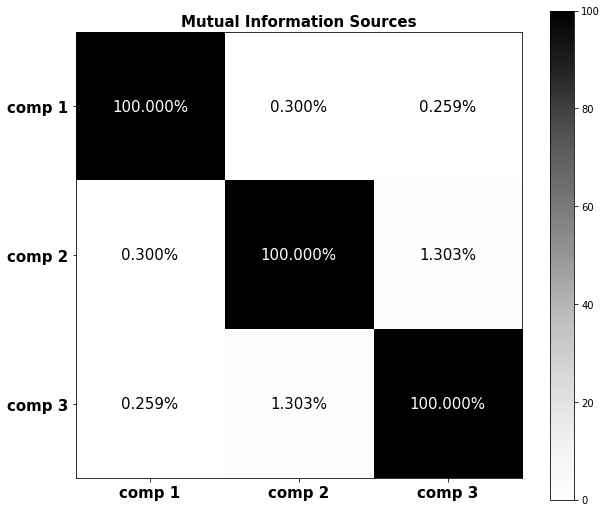

In [76]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run2_sources_MI_100k',save=True)

In [86]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='deflation',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 7
Time to converges the FastICA: 16.842 seconds


In [87]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.0029571 ,  0.00269083],
       [ 0.0029571 ,  1.        ,  0.01445214],
       [ 0.00269083,  0.01445214,  1.        ]])

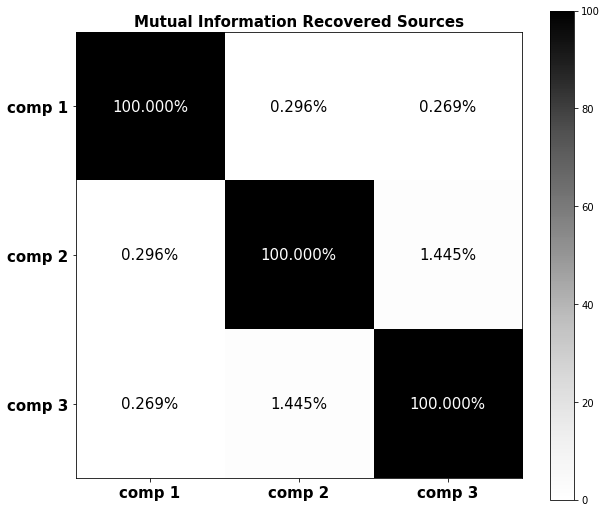

In [88]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,name='run2_reco_MI_100k',save=True)

In [89]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.96055001,  0.00298465,  0.00273185],
       [ 0.0029952 ,  0.12373661,  0.06761742],
       [ 0.00263553,  0.06821027,  0.12219209]])

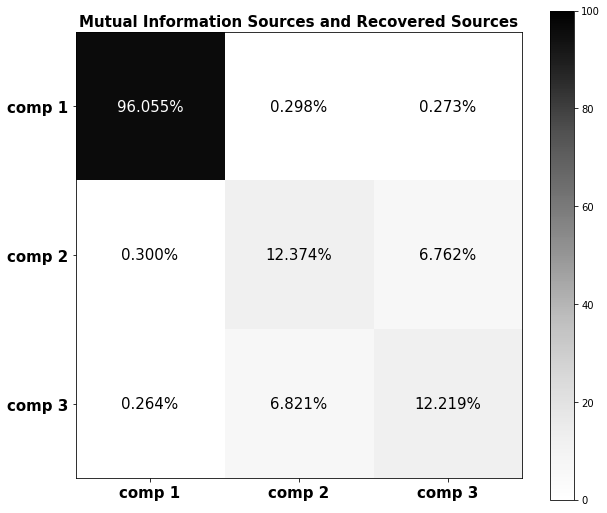

In [90]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,name='run2_sourcesreco_MI_100k',save=True)

In [91]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.96055001,  0.00298465,  0.00273185],
       [ 0.0029952 ,  0.12373661,  0.06761742],
       [ 0.00263553,  0.06821027,  0.12219209]])

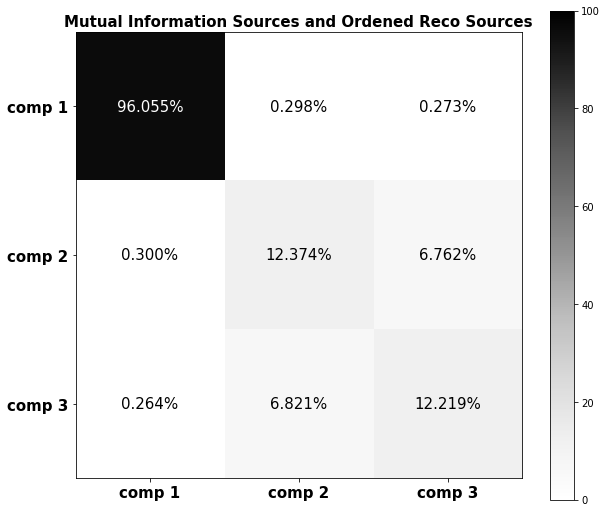

In [92]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,name='run2_sourcesreco_ordened_MI_100k',save=True)

In [93]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [94]:
SKL_div,JS_div

(array([[ 0.03117433,  0.76153297,  0.70170147],
        [ 0.3961394 ,  0.04228491,  0.17148837],
        [ 0.42842854,  0.14675897,  0.31138848]]),
 array([[ 0.01570964,  0.21449409,  0.21867055],
        [ 0.40511701,  0.02271218,  0.03841329],
        [ 0.35591124,  0.13528762,  0.16650379]]))

In [95]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.015710 &  0.214494 &  0.218671 \\
1 &  0.405117 &  0.022712 &  0.038413 \\
2 &  0.355911 &  0.135288 &  0.166504 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  0.031174 &  0.761533 &  0.701701 \\
1 &  0.396139 &  0.042285 &  0.171488 \\
2 &  0.428429 &  0.146759 &  0.311388 \\
\bottomrule
\end{tabular}



In [96]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.        ,   5.        ,   7.        ],
       [  0.022     ,   0.188     ,  16.842     ],
       [  6.0413257 ,   5.20997112,   7.2786001 ],
       [  3.7050884 ,   2.95831886,   5.16102749],
       [  0.87381188,   1.16286236,   1.11171913]])

In [97]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &          2 \\
\midrule
0 &  6.000000 &  5.000000 &   7.000000 \\
1 &  0.022000 &  0.188000 &  16.842000 \\
2 &  6.041326 &  5.209971 &   7.278600 \\
3 &  3.705088 &  2.958319 &   5.161027 \\
4 &  0.873812 &  1.162862 &   1.111719 \\
\bottomrule
\end{tabular}

